In [3]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt

In [4]:
def taxicab(tup1, tup2):
    dist = 0
    
    for i in range(len(tup1)-1):
        dist = dist + abs(tup1[i]-tup2[i])
    return dist

def lineardist(tup1,tup2):
    dist = np.linalg.norm(np.subtract(tup1[:len(tup1)-1],tup2[:len(tup2)-1]))
    return dist

In [5]:
def destinations(n,var,x, y):
    dests = []
    for i in range(n):
        dests.append(tuple(np.append(var*np.random.randn(2) + [x,y],i+1)))
    return dests

def timevals(n):
    values = np.random.randint(100,size = n)
    return np.append(0,values/np.mean(values))

def dummytimeval(n):
    values = np.zeros(n)+1
    return np.append(0,values)

In [6]:
perms = it.permutations(destinations(3,1,5,5))
permlist = []
for x in perms:
    permlist.append(x)

In [7]:
#for x in perms: 
#  print x 

In [8]:
vals = timevals(3)
dummyvals = dummytimeval(3)
print dummyvals

[ 0.  1.  1.  1.]


In [9]:
def cost(weights, path, startx, starty):
    origin = tuple([startx,starty, 0])
    currloc = origin
    currcost = sum(weights)
    totalcost = 0
    for i in range(len(path)):
        #totalcost += currcost * taxicab(currloc,path[i])
        totalcost += currcost * lineardist(currloc,path[i])
        currcost = currcost-weights[path[i][2]]
        currloc = path[i]
    return totalcost

In [10]:
#permlist = []
wgtcost = []
unwgtcost = []

for i in range(len(permlist)):
    wgtcost.append(cost(vals,permlist[i],0,0))
    unwgtcost.append(cost(dummyvals,permlist[i],0,0))
    #permlist.append(x)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [11]:
optimal =  wgtcost.index(min(wgtcost))
shortest =  unwgtcost.index(min(unwgtcost))
print wgtcost[optimal]/wgtcost[shortest]

0.925400933078


In [12]:
riders = 7
dispersion = 6
centerx = 10
centery = 10

In [25]:
output = []
socialcost = []
for j in range(20):
    dispersion = j
    savings = []
    unsavings = []
    for i in range(40):
        perms = it.permutations(destinations(riders,dispersion,centerx,centery))
        lst = list(perms)
        np.random.shuffle(lst)
        #for i in lst:
        #print i
        if riders > 5:
            lst = lst[:120]
        permlist = []
        for x in lst:
            permlist.append(x)

        vals = timevals(riders)
        dummyvals = dummytimeval(riders)
        #print dummyvals
        wgtcost = []
        unwgtcost = []

        for i in range(len(permlist)):
            wgtcost.append(cost(vals,permlist[i],0,0))
            unwgtcost.append(cost(dummyvals,permlist[i],0,0))

        optimal =  wgtcost.index(min(wgtcost))
        #lindist = unwgtcost.index(min(wgtcost))
        shortest =  unwgtcost.index(min(unwgtcost))
        savings.append(wgtcost[optimal]/wgtcost[shortest])
        unsavings.append(unwgtcost[optimal]/wgtcost[shortest])
    output.append(np.mean(savings))
    socialcost.append(np.mean(unsavings))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


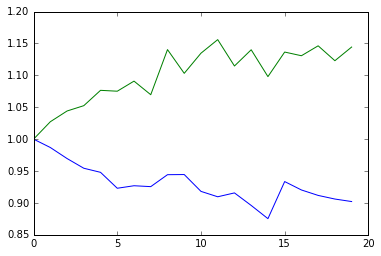

In [26]:
%matplotlib inline

#print np.mean(savings)
plt.plot(output)
plt.plot(socialcost)